<a href="https://colab.research.google.com/github/Kenni192/Cloud-Native-Application-Architecture-Nanodegree/blob/main/Copy_of_GPW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 2

## Step 3

# Point a: Data for (JPM,WFC, BAC, C, G, USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, BBT, STI)
 BBT and STI are now part of TFC

In [ ]:
try:
    import yfinance as yf
    import pandas as pd
except:
    !pip install yfinance pandas
    import yfinance as yf
    import pandas as pd

# Define tickers
tickers = {
    'JPM', 'WFC', 'BAC', 'C', 'USB', 'MS', 'KEY', 'PNC', 'COF',
    'AXP', 'PRU', 'SCHW', 'TFC'  # TFC replaces BBT and STI (Truist Financial)
}

# Define date range
start = "2008-09-01"
end = "2008-10-31"

# Initialize an empty DataFrame
df = pd.DataFrame()

# Download data for each ticker
for tick in tickers:
    ydata = yf.download(tick, start=start, end=end)
    df[tick] = ydata['Close']

# Set index as datetime
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# Display first few rows
print(df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                   MS        WFC           C       KEY        PNC       SCHW  \
Date                                                                           
2008-09-02  28.875484  20.334965  142.595291  7.768855  46.888954  19.615885   
2008-09-03  29.483768  20.204655  146.326172  7.836681  47.323116  19.640223   
2008-09-04  28.204298  19.331581  136.551193  7.349584  46.448406  19.112906   
2008-09-05  28.917433  20.328461  142.296829  7.996985  47.431652  19.542875   
2008-09-08  30.252842  21.866117  151.624039  8.471752  49.021431  20.459568   

                  USB        TFC        JPM        BAC        AXP        COF  \
Date                                                                           
2008-09-02  20.012484  17.174200  25.730108  24.700560  31.324312  34.223358   
2008-09-03  20.371067  17.369225  26.205242  25.449537  31.540171  34.787159   
2008-09-04  19.567347  16.733967  25.017395  23.627291  29.874889  33.011993   
2008-09-05  20.241228  17.731424  26.13

## Step 3b - Collecting the data for 15 non-financial institutions

In [ ]:
import yfinance as yf
import pandas as pd

# Define tickers
financials = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "TFC", "^STI"]
non_financials = ["KR", "PFE", "XOM", "WM", "DAL", "CSCO", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]

# Function to download data
def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    return data

# Fetch data for Sep 2008 - Oct 2008
start_date = "2008-09-01"
end_date = "2008-10-31"

financial_data = fetch_stock_data(financials, start_date, end_date)
non_financial_data = fetch_stock_data(non_financials, start_date, end_date)

# Save as CSV
financial_data.to_csv("financial_stocks.csv")
non_financial_data.to_csv("non_financial_stocks.csv")

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  14 of 14 completed


### 3c. Computing the daily returns of all 30 series.

In [ ]:
# Load the data
financial_data = pd.read_csv("financial_stocks.csv", index_col=0, parse_dates=True)
non_financial_data = pd.read_csv("non_financial_stocks.csv", index_col=0, parse_dates=True)

# Merge datasets
all_data = pd.concat([financial_data, non_financial_data], axis=1)

# Compute daily returns
daily_returns = all_data.pct_change().dropna()

# Save final dataset
daily_returns.to_csv("daily_returns.csv")

# Display first few rows
print(daily_returns.head())


                 AXP       BAC         C       COF        GS       JPM  \
Date                                                                     
2008-09-03  0.006891  0.030322  0.026164  0.016474  0.013852  0.018466   
2008-09-04 -0.052799 -0.071602 -0.066803 -0.051030 -0.040034 -0.045329   
2008-09-05  0.016774  0.053268  0.042076  0.031849  0.014543  0.044580   
2008-09-08  0.028427  0.077567  0.065548  0.089912  0.039757  0.049242   
2008-09-09 -0.056268 -0.063634 -0.070866 -0.066283 -0.047487 -0.050060   

                 KEY        MS       PNC       PRU  ...       DUK      EQIX  \
Date                                                ...                       
2008-09-03  0.008730  0.021066  0.009259  0.026601  ... -0.012687 -0.009883   
2008-09-04 -0.062156 -0.043396 -0.018484 -0.031950  ...  0.009930 -0.033063   
2008-09-05  0.088088  0.025285  0.021168  0.023128  ...  0.001157 -0.000129   
2008-09-08  0.059367  0.046179  0.033517  0.078487  ...  0.032351  0.000258   
2008-09

<ipython-input-2-09046097ad25>:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = all_data.pct_change().dropna()


## Step 4 - Computing a 30×30 Correlation Matrix and Heatmap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load daily returns data
daily_returns = pd.read_csv("daily_returns.csv", index_col=0, parse_dates=True)

# Compute correlation matrix
correlation_matrix = daily_returns.corr()

# Display first few values
print(correlation_matrix.head())

# Save the correlation matrix as CSV
correlation_matrix.to_csv("correlation_matrix.csv")


          AXP       BAC         C       COF        GS       JPM       KEY  \
AXP  1.000000  0.763411  0.748182  0.822356  0.695820  0.676413  0.702464   
BAC  0.763411  1.000000  0.904035  0.799047  0.661775  0.840628  0.753169   
C    0.748182  0.904035  1.000000  0.790941  0.623446  0.800970  0.742449   
COF  0.822356  0.799047  0.790941  1.000000  0.487568  0.719848  0.730262   
GS   0.695820  0.661775  0.623446  0.487568  1.000000  0.457664  0.595027   

           MS       PNC       PRU  ...       DUK      EQIX         F  \
AXP  0.711552  0.585923  0.748221  ...  0.555105  0.727828  0.670814   
BAC  0.539035  0.653550  0.618639  ...  0.365083  0.628118  0.623456   
C    0.550131  0.616420  0.615756  ...  0.365737  0.607205  0.532483   
COF  0.492565  0.669604  0.746518  ...  0.435240  0.638251  0.695948   
GS   0.814933  0.193893  0.595895  ...  0.404719  0.587595  0.500631   

           GE        KR      NFLX       PFE      REGN        WM       XOM  
AXP  0.626312  0.616664  0.3

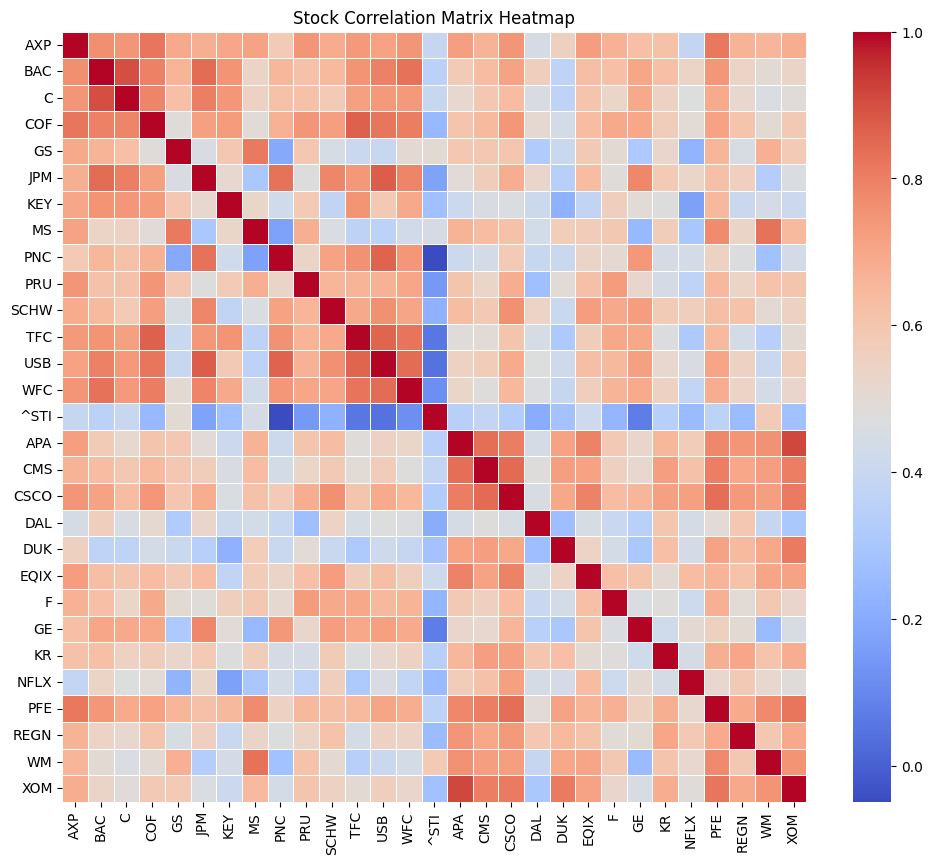

In [ ]:
# We use Seaborn to create the heatmap.
# Set figure size
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Stock Correlation Matrix Heatmap")

# Show plot
plt.show()


## Sorting Stocks for Better Visualization

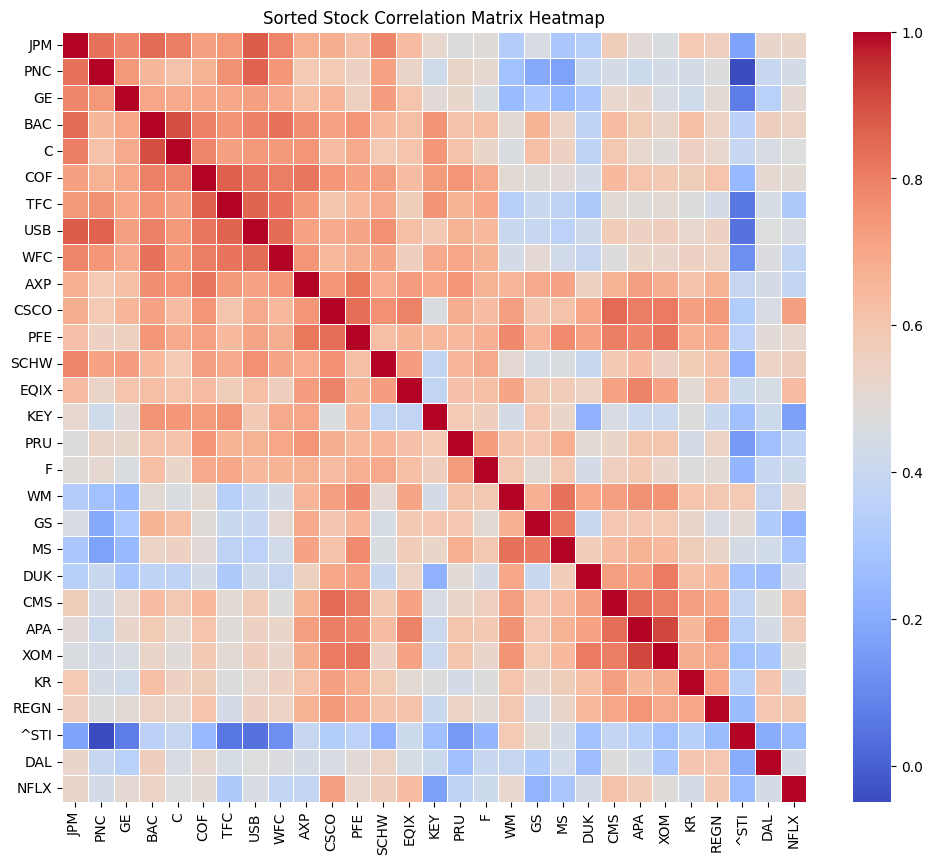

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method="ward")

# Reorder correlation matrix based on clustering
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import leaves_list

# Compute distances
distance_matrix = ssd.pdist(correlation_matrix)
linkage_matrix = linkage(distance_matrix, method="ward")
sorted_indices = leaves_list(linkage_matrix)

# Reorder columns and rows
sorted_corr_matrix = correlation_matrix.iloc[sorted_indices, sorted_indices]

# Plot reordered heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Sorted Stock Correlation Matrix Heatmap")
plt.show()


## Step 7. Python Implementation of Epsilon-Greedy Multi-Armed Bandit for Portfolio Selection

This implementation follows the epsilon-greedy strategy to select stocks dynamically based on their estimated returns

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
# Load and Prepare Data (Daily Returns)
# Load the daily returns dataset (from previous steps)
daily_returns = pd.read_csv("daily_returns.csv", index_col=0, parse_dates=True)

# Get stock tickers
stocks = daily_returns.columns.tolist()

# Set the number of trading periods (N) and portfolio size (K)
N = len(daily_returns)  # Number of days in dataset
K = 5  # Number of stocks in portfolio
epsilon = 0.1  # 10% chance to explore

In [ ]:
# Implement the Epsilon-Greedy Algorithm
# Initialize variables
estimated_mean_return = {stock: 0 for stock in stocks}  # Estimated returns
times_chosen = {stock: 0 for stock in stocks}  # Count of selections
portfolio_history = []  # Store selected portfolios

# Simulation loop (over trading periods)
for t in range(N):
    # Decide whether to explore or exploit
    if np.random.rand() < epsilon:
        # Exploration: Randomly select K stocks
        selected_stocks = random.sample(stocks, K)
    else:
        # Exploitation: Select K stocks with highest estimated returns
        selected_stocks = sorted(estimated_mean_return, key=estimated_mean_return.get, reverse=True)[:K]

    # Store portfolio history
    portfolio_history.append(selected_stocks)

    # Observe actual returns for selected stocks
    actual_returns = daily_returns.iloc[t][selected_stocks]

    # Update statistics for each selected stock
    for stock in selected_stocks:
        times_chosen[stock] += 1
        estimated_mean_return[stock] += (actual_returns[stock] - estimated_mean_return[stock]) / times_chosen[stock]

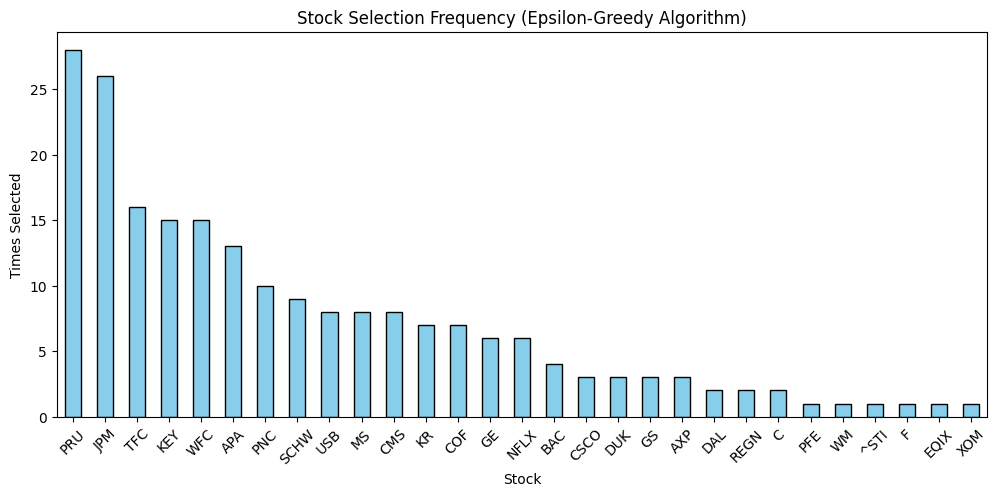

In [ ]:

# Visualize Portfolio Selection Over Time
# Convert portfolio history to a DataFrame
portfolio_df = pd.DataFrame(portfolio_history, columns=[f"Stock_{i+1}" for i in range(K)])
portfolio_df.index = daily_returns.index  # Use same time index as returns

# Plot the selection frequency of each stock
stock_selection_counts = pd.Series(times_chosen).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
stock_selection_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Stock Selection Frequency (Epsilon-Greedy Algorithm)")
plt.xlabel("Stock")
plt.ylabel("Times Selected")
plt.xticks(rotation=45)
plt.show()